In [1]:
import sys
print(sys.version)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [ ]:
# AI Music Healthcare Generator
## A 2025 Research Project using Generative AI for Therapeutic Music

This project generates personalized music based on patient vital signs using state-of-the-art AI music generation APIs.

In [3]:
import os

folders = ["data/wesad", "models", "utils", "logs", "streamlit_app"]
for folder in folders:
    os.makedirs(folder, exist_ok=True)


In [1]:
import neurokit2 as nk


In [2]:
import neurokit2 as nk
import matplotlib.pyplot as plt


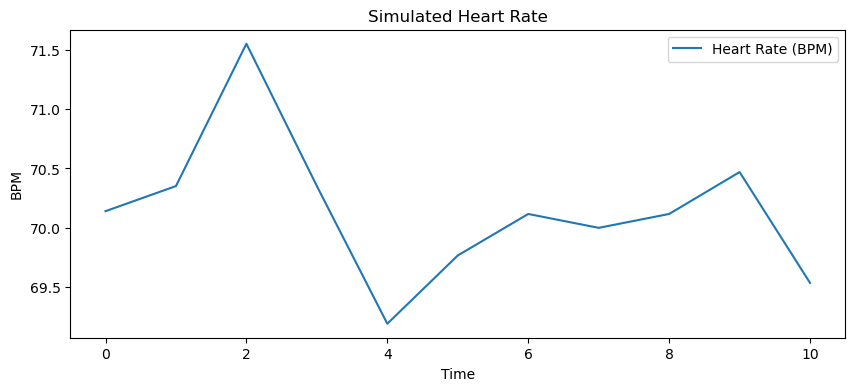

In [3]:
# Simulate 10 seconds of ECG signal
ecg_signal = nk.ecg_simulate(duration=10, sampling_rate=700)

# Clean and process ECG
ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=700)
ecg_peaks, _ = nk.ecg_peaks(ecg_cleaned, sampling_rate=700)
heart_rate = nk.ecg_rate(ecg_peaks, sampling_rate=700)

# Plot heart rate
plt.figure(figsize=(10, 4))
plt.plot(heart_rate, label="Heart Rate (BPM)")
plt.title("Simulated Heart Rate")
plt.xlabel("Time")
plt.ylabel("BPM")
plt.legend()
plt.show()


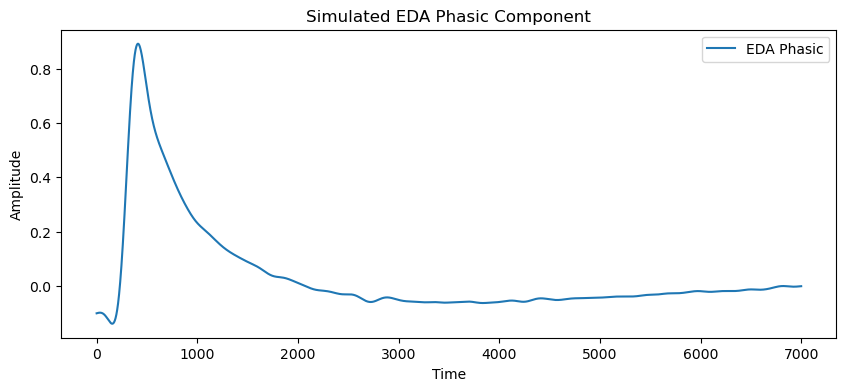

In [4]:
# Simulate 10 seconds of EDA signal
eda_signal = nk.eda_simulate(duration=10, sampling_rate=700)

# Clean and process EDA
eda_cleaned = nk.eda_clean(eda_signal, sampling_rate=700)
eda_phasic = nk.eda_phasic(eda_cleaned, sampling_rate=700)

# Plot EDA phasic component
plt.figure(figsize=(10, 4))
plt.plot(eda_phasic["EDA_Phasic"], label="EDA Phasic")
plt.title("Simulated EDA Phasic Component")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [2]:
import sys
print(sys.executable)


c:\Users\Joya Parveen\Videos\New folder\python.exe


In [10]:
import pickle

file_path = r"C:\Users\Joya Parveen\OneDrive\Desktop\ai-music-healthcare-project\data\wesad\WESAD\S2\S2.pkl"

# Load using 'latin1' encoding to avoid Unicode errors
with open(file_path, "rb") as file:
    data = pickle.load(file, encoding='latin1')

# See what’s inside
print(data.keys())


dict_keys(['signal', 'label', 'subject'])


In [11]:
print(data['signal'].keys())


dict_keys(['chest', 'wrist'])


In [12]:
print("Chest signals:", data['signal']['chest'].keys())
print("Wrist signals:", data['signal']['wrist'].keys())


Chest signals: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
Wrist signals: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])


In [13]:
# Extract ECG and EDA from chest
ecg_signal = data['signal']['chest']['ECG'][:, 0]  # ECG channel
eda_signal = data['signal']['chest']['EDA'][:, 0]  # EDA channel

print("ECG length:", len(ecg_signal))
print("EDA length:", len(eda_signal))


ECG length: 4255300
EDA length: 4255300


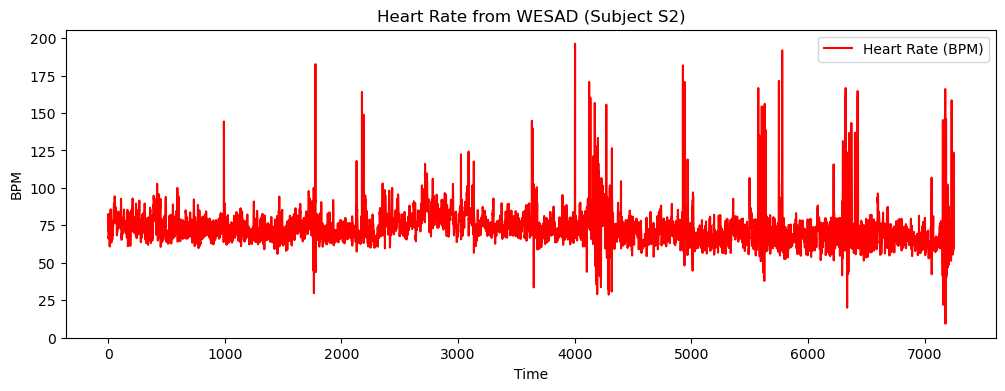

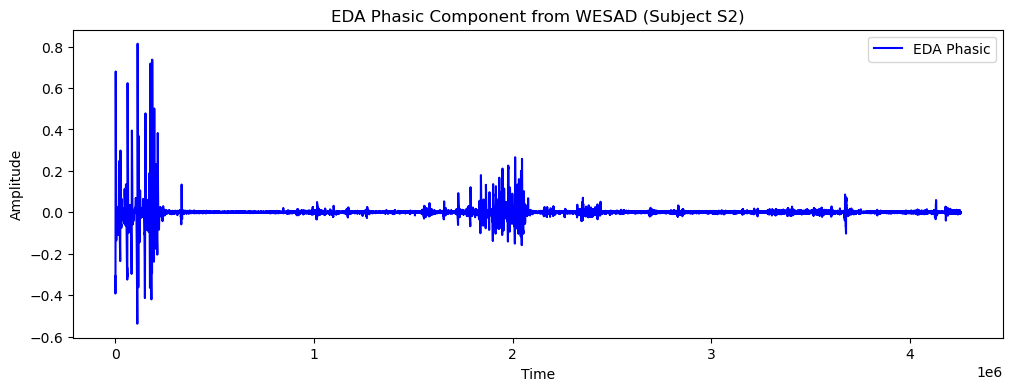

In [14]:
import neurokit2 as nk
import matplotlib.pyplot as plt

# Sampling rate for chest signals in WESAD is 700 Hz
sampling_rate = 700

# Clean ECG and extract heart rate
ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling_rate)
ecg_peaks, _ = nk.ecg_peaks(ecg_cleaned, sampling_rate=sampling_rate)
heart_rate = nk.ecg_rate(ecg_peaks, sampling_rate=sampling_rate)

# Clean EDA and extract phasic component
eda_cleaned = nk.eda_clean(eda_signal, sampling_rate=sampling_rate)
eda_phasic = nk.eda_phasic(eda_cleaned, sampling_rate=sampling_rate)

# Plot heart rate
plt.figure(figsize=(12, 4))
plt.plot(heart_rate, label="Heart Rate (BPM)", color='red')
plt.title("Heart Rate from WESAD (Subject S2)")
plt.xlabel("Time")
plt.ylabel("BPM")
plt.legend()
plt.show()

# Plot EDA phasic
plt.figure(figsize=(12, 4))
plt.plot(eda_phasic["EDA_Phasic"], label="EDA Phasic", color='blue')
plt.title("EDA Phasic Component from WESAD (Subject S2)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [15]:
# Get emotion labels
labels = data['label']

# Print unique labels
print("Unique labels:", set(labels))


Unique labels: {0, 1, 2, 3, 4, 6, 7}


In [16]:
# Combine ECG and EDA for all samples
import numpy as np
# Convert signals to NumPy arrays
ecg_array = np.array(ecg_signal)
eda_array = np.array(eda_signal)
labels_array = np.array(data['label'])

# Combine ECG and EDA into one feature set
X_all = np.stack([ecg_array, eda_array], axis=1)

# Use all labels as targets
y_all = labels_array


In [17]:
# Downsample by taking every 100th sample
X_small = X_all[::100]
y_small = y_all[::100]

print("New sample size:", len(X_small))
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split smaller dataset
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


New sample size: 42553
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      4295
           1       0.57      0.51      0.53      1653
           2       0.39      0.36      0.38       824
           3       0.33      0.27      0.29       486
           4       0.58      0.57      0.57      1079
           6       0.20      0.10      0.14        97
           7       0.06      0.04      0.05        77

    accuracy                           0.59      8511
   macro avg       0.40      0.37      0.38      8511
weighted avg       0.58      0.59      0.58      8511



In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_small, y_small)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the balanced data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.49      0.57      4291
           1       0.74      0.72      0.73      4228
           2       0.76      0.79      0.77      4259
           3       0.79      0.82      0.80      4290
           4       0.79      0.81      0.80      4376
           6       0.86      0.96      0.91      4344
           7       0.83      0.91      0.87      4210

    accuracy                           0.79     29998
   macro avg       0.78      0.79      0.78     29998
weighted avg       0.78      0.79      0.78     29998



In [20]:
new_sample = [0.45, 0.67]  # Just two values!
import numpy as np
new_sample = np.array(new_sample).reshape(1, -1)

predicted_emotion = model.predict(new_sample)[0]

emotion_to_music = {
    0: "Calm instrumental",
    1: "Upbeat pop",
    2: "Energetic workout tracks",
    3: "Focus-enhancing ambient",
    4: "Happy dance tunes",
    6: "Relaxing nature sounds",
    7: "Soothing acoustic"
}

recommended_music = emotion_to_music.get(predicted_emotion, "Default playlist")
print("Predicted emotion:", predicted_emotion)
print("Recommended music:", recommended_music)
print("Expected number of features:", model.n_features_in_)


Predicted emotion: 0
Recommended music: Calm instrumental
Expected number of features: 2


In [21]:
import webbrowser

query = recommended_music + " playlist"
url = f"https://www.youtube.com/results?search_query={query}"
webbrowser.open(url)


True

In [22]:
!pip install youtube-search-python


In [23]:
import numpy as np

# Example input with 2 features (adjust values as needed)
new_sample = [0.45, 0.67]
new_sample = np.array(new_sample).reshape(1, -1)

# Predict emotion
predicted_emotion = model.predict(new_sample)[0]

# Map emotion to music
emotion_to_music = {
    0: "Calm instrumental",
    1: "Upbeat pop",
    2: "Energetic workout tracks",
    3: "Focus-enhancing ambient",
    4: "Happy dance tunes",
    6: "Relaxing nature sounds",
    7: "Soothing acoustic"
}

recommended_music = emotion_to_music.get(predicted_emotion, "Default playlist")


In [25]:
import webbrowser

search_query = recommended_music + " playlist"
url = f"https://www.youtube.com/results?search_query={search_query}"
webbrowser.open(url)
try:
    from youtubesearchpython import VideosSearch
    search_query = recommended_music + " playlist"
    videosSearch = VideosSearch(search_query, limit=1)
    video_url = videosSearch.result()['result'][0]['link']
    webbrowser.open(video_url)
except Exception as e:
    print("Error fetching video:", e)
    # Fallback to search page
    fallback_url = f"https://www.youtube.com/results?search_query={search_query}"
    webbrowser.open(fallback_url)


Error fetching video: post() got an unexpected keyword argument 'proxies'


In [26]:
!pip install youtube-search-python==1.6.5


     ---------------------------------------- 0.0/99.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/99.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/99.3 kB ? eta -:--:--
     ----------------------- -------------- 61.4/99.3 kB 544.7 kB/s eta 0:00:01
     ----------------------- -------------- 61.4/99.3 kB 544.7 kB/s eta 0:00:01
     -------------------------------------- 99.3/99.3 kB 438.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/89.0 kB ? eta -:--:--
   ------------------------------------ --- 81.9/89.0 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 89.0/89.0 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: youtube-search-python
    Found existing installation: youtube-search-python 1.6.6
    Uninstalling youtube-search-python-1.6.6:
      Successfully uninstalled youtube-search-python-1.6.6


In [27]:
import webbrowser

search_query = recommended_music + " playlist"
url = f"https://www.youtube.com/results?search_query={search_query}"
webbrowser.open(url)


True

In [28]:
!pip install streamlit